In [1867]:
from functions import *
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures,RobustScaler
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve, RandomizedSearchCV
from sklearn.dummy import DummyRegressor
import pickle

In [1868]:
df = pd.read_csv("dataset_clear.csv")

In [1869]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'cat_bmi'],
      dtype='object')

In [1870]:
feature = df.columns[0:-1]
target = 'charges'
X =df.drop(["charges","bmi"],axis=1)
y = df[target]



In [1871]:
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True, random_state=42, train_size = 0.8,stratify=X[["smoker"]])

In [1872]:
dummy = DummyRegressor()

In [1873]:
numerical_features = [
       'age','children'
       ]
categorical_features = [
       'sex' , 'smoker', 'region',"cat_bmi"
       ]



In [1874]:


my_col_trans = ColumnTransformer([
    ("sclal",RobustScaler(),numerical_features),
    
    ("one_hot_encoder",OneHotEncoder(handle_unknown='ignore'),categorical_features),
    
])



In [1875]:
dummy.fit(X_train,y_train)
dummy.score(X_train,y_train)

0.0

In [1876]:
dummy.score(X_test,y_test)

-0.0010185684988295307

In [1877]:
# modelLasso= make_pipeline(my_col_trans,PolynomialFeatures(degree=2), Lasso(max_iter=100000,random_state=42))
# parameters = {"lasso__alpha":np.linspace(0.1,100,1000)}
# randm_src = GridSearchCV(estimator=modelLasso, param_grid=parameters,scoring='r2',cv=5)
# randm_src.fit(X_train, y_train)

# modelLasso.set_params(**randm_src.best_params_)
# print(randm_src.best_params_)
# best=randm_src.best_params_

In [1878]:
best={'lasso__alpha': 31.500000000000004}


In [1879]:
modelLasso= make_pipeline(my_col_trans,PolynomialFeatures(degree=2), Lasso(alpha=best["lasso__alpha"],max_iter=100000,random_state=42))
modelLasso.fit(X_train,y_train)
modelLasso.score(X_train,y_train)


0.8553128878374463

In [1880]:
modelLasso.score(X_test,y_test)

0.9188265840581065

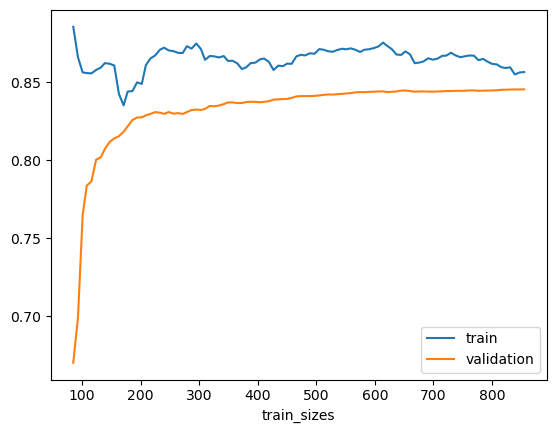

In [1881]:
train_sizes = np.linspace(0.1, 1.0, 100)
train_sizes, train_scores, test_scores = learning_curve(modelLasso,X_train,y_train,cv=5,train_sizes=train_sizes)                                       
                                           
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

In [1882]:
y_pred = modelLasso.predict(X_train)

In [1883]:
residual = (y_pred - y_train).abs().sort_values(ascending=False)

In [1884]:
residual.describe()

count     1069.000000
mean      2594.011131
std       3817.254588
min          0.507947
25%       1170.183746
50%       1585.811589
75%       1982.056698
max      23957.055601
Name: charges, dtype: float64

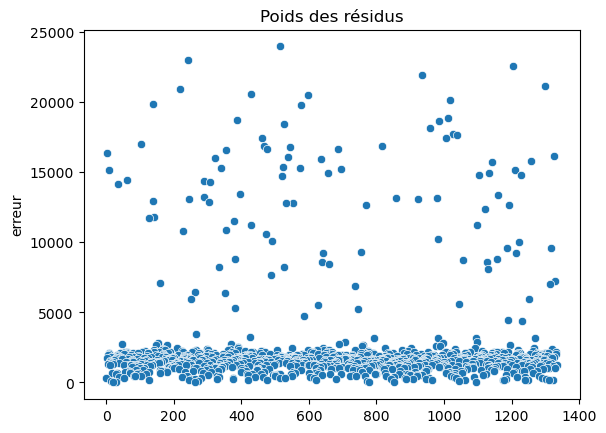

In [1885]:


sns.scatterplot(residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()



In [1886]:
to_drop = residual[residual > 15000].index

In [1887]:
X_train.loc[to_drop]

,age,sex,children,smoker,region,cat_bmi
516,20,male,1,no,southeast,obesity
242,55,female,1,no,southwest,overweight
1205,59,female,2,no,southwest,obesity
935,44,male,2,no,northeast,overweight
1299,45,male,0,yes,southeast,obesity
219,24,female,0,no,southeast,healthy
430,19,male,0,no,southwest,obesity
598,52,female,2,no,northwest,obesity
1018,21,female,2,no,northwest,obesity
140,34,male,2,no,northeast,healthy


In [1888]:


X_train = X_train.drop(to_drop)
y_train = y_train.drop(to_drop)



In [1889]:


modelLasso.fit(X_train,y_train)
modelLasso.score(X_train,y_train)



0.9346511154419672

In [1890]:


modelLasso.score(X_test,y_test)



0.924025248830534

In [1891]:
y_pred = modelLasso.predict(X_train)
residual = (y_pred - y_train).abs().sort_values()

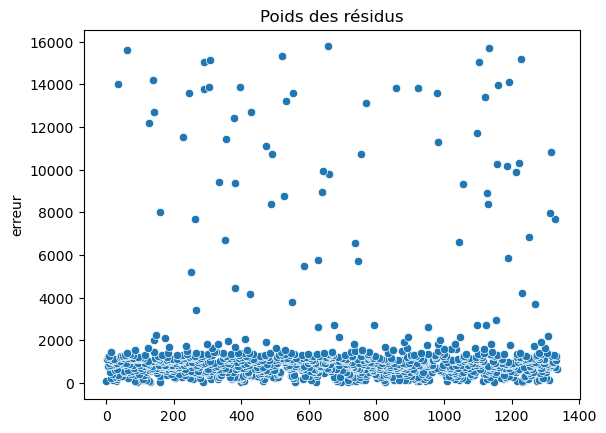

In [1892]:
sns.scatterplot(residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()

In [1893]:
residual.describe()

count     1029.000000
mean      1493.641752
std       2583.935033
min         16.913227
25%        586.614564
50%        906.800680
75%       1202.215054
max      15768.925311
Name: charges, dtype: float64

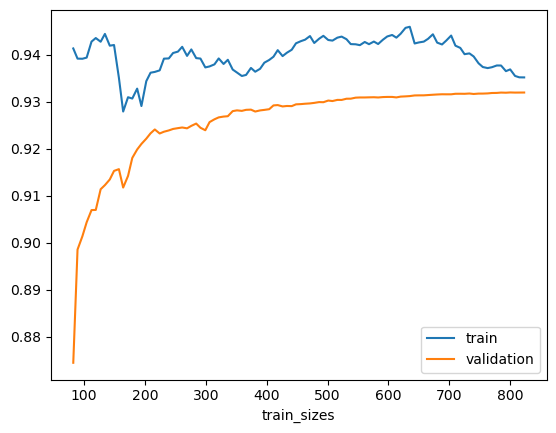

In [1894]:
train_sizes = np.linspace(0.1, 1.0, 100)
train_sizes, train_scores, test_scores = learning_curve(modelLasso,X_train,y_train,cv=5,train_sizes=train_sizes)   
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

In [1895]:
pickle_out = open("modelLasso.pkl", "wb") 
pickle.dump(modelLasso, pickle_out) 
pickle_out.close()